# Spotify Song Prediction Project
Project mentor: Sophia Sklaviadis

Benjamin Fry <bfry2@jh.edu>, Cassie Parent <cparent5@jh.edu>, Alexandra Szewc <aszewc1@jh.edu>

Link to Project Repo: https://github.com/benf549/CS475-Machine-Learning-Final-Project

In [1]:
import json, torch, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive
# !unzip dataset.zip
# !unzip playlist_membership_data.zip
# !unzip fourier_data.zip

Mounted at /content/drive
/content/drive/MyDrive


# Load In The Data

In [3]:
if "dense_mtx.npy" in os.listdir():
    dense_mtx = np.load("dense_mtx.npy")
else:
    file_list = [x for x in os.listdir("./temp") if ".npy" in x]
    file_list.sort(key=lambda x : int(x.split("_")[2]))
    
    dense_mtx = np.zeros((22359, 10000))
    
    for idx, chunk in enumerate(file_list):
        chunk_offset = int(chunk.split("_")[2])
        mtx = np.load(f"./temp/{chunk}")
        if idx == len(file_list) - 1:
            num_elem = 59
        else:
            num_elem = 100
        dense_mtx[chunk_offset:chunk_offset+num_elem] = mtx
    
    np.save("dense_mtx.npy", dense_mtx)

In [4]:
labels = []
with open("./temp/npy_chunk_labels.txt", "r") as f:
    for line in f.readlines():
        line = line.strip().replace(".mp3", "")
        labels.append(line)
labels = np.array(labels)
assert(labels.size == dense_mtx.shape[0])

In [5]:
# Read in the JSON data
data_stream = ""
with open("challenge_set.json", "r") as f:
    data_stream = f.read()
data_set = json.loads(data_stream)


# Grab unique track/artist pairs
track_uris = set()
playlist_idcs = []

for i,j in enumerate(data_set["playlists"]):
    if len(j["tracks"]) == 100:
        playlist_idcs.append(i) 
        for track in j["tracks"]:
            track_uris.add((track["track_name"], track["artist_name"], track["track_uri"]))
unique_tracks = list(track_uris)

# Define mapping between URIs and trakcs
uri_to_title_artist_map = {x[2]: (x[0], x[1]) for x in unique_tracks}
# for i,(j,k) in enumerate(uri_to_title_artist_map.items()):
#     if i > 5: break
#     print(j,k)

# Rearranging data table
df = pd.read_csv("all_downloaded_data.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.set_index('uri')
df = df.drop_duplicates()

print(df.head())

                                      danceability  energy  key  loudness  \
uri                                                                         
spotify:track:38uqMByifM0mkjcTbejlyR         0.375   0.294    8    -8.751   
spotify:track:4kOTDj4SiZPkW1p96WMDNv         0.950   0.803    1    -4.195   
spotify:track:1c9LBfX0klXJscJAYDI0Ea         0.758   0.501    0    -7.051   
spotify:track:59iNA6gwthoTJ6IgpBGGHW         0.534   0.749    6    -5.562   
spotify:track:4QCng4MDyUhEZ730Ma2Rjp         0.674   0.744   11    -5.196   

                                      mode  speechiness  acousticness  \
uri                                                                     
spotify:track:38uqMByifM0mkjcTbejlyR     1       0.0329        0.9280   
spotify:track:4kOTDj4SiZPkW1p96WMDNv     1       0.1510        0.1450   
spotify:track:1c9LBfX0klXJscJAYDI0Ea     1       0.0589        0.2520   
spotify:track:59iNA6gwthoTJ6IgpBGGHW     0       0.0749        0.0776   
spotify:track:4QCng4MD

In [6]:
data_size = dense_mtx.shape[0]
test_dev_idcs = np.random.choice(data_size, replace=False, size=int(0.3*data_size))

dev_idcs = np.random.choice(test_dev_idcs.shape[0], replace=False, size=int((2/3) * test_dev_idcs.shape[0]))
selected_dev_uris = labels[test_dev_idcs[dev_idcs]]
dev_data = dense_mtx[test_dev_idcs[dev_idcs]]
dev_labels = df.loc[selected_dev_uris].iloc[:, 0:11].to_numpy()

print("dev")
print(dev_data.shape)
print(dev_labels.shape)

test_idcs = np.delete(test_dev_idcs, dev_idcs, axis=0)
selected_test_uris = labels[test_idcs]
test_data = dense_mtx[test_idcs]
test_labels = df.loc[selected_test_uris].iloc[:, 0:11].to_numpy()

print("test")
print(test_data.shape)
print(test_labels.shape)

train_idcs = np.delete(np.arange(data_size), test_dev_idcs, axis=0)
selected_train_uris = labels[train_idcs]
train_data = dense_mtx[train_idcs]
train_labels = df.loc[selected_train_uris].iloc[:, 0:11].to_numpy()

print("train")
print(train_data.shape)
print(train_labels.shape)

dev
(4471, 10000)
(4471, 11)
test
(2236, 10000)
(2236, 11)
train
(15652, 10000)
(15652, 11)


In [7]:
def normalize(data, mean, std):
    return (data - mean) / std 

train_data_means = train_data.mean(axis=0)
train_data_std = train_data.std(axis=0)
train_data = normalize(train_data, train_data_means, train_data_std)

train_label_means = train_labels.mean(axis=0)
train_label_std = train_labels.std(axis=0)
train_labels = normalize(train_labels, train_label_means, train_label_std) 

dev_data = normalize(dev_data, train_data_means, train_data_std)
dev_labels = normalize(dev_labels, train_label_means, train_label_std) 

test_data = normalize(test_data, train_data_means, train_data_std)
test_labels = normalize(test_labels, train_label_means, train_label_std) 

# Train A New Model 

In [8]:
#Don't run training on the CPU, wait until GPU is available or copy to another drive account and uncomment lines with .cuda or .cpu
#Remove this when training on GPU
raise ValueError() 

ValueError: ignored

In [ ]:
lr = 0.001
batch_size = 10000
epochs = 1000
dr = 0.5

In [ ]:
class RecommenderNet(torch.nn.Module):
    ### Implement your model's structure and input/filter/output dimensions
    def __init__(self, dr):
        super().__init__()
        
        self.lin1 = torch.nn.Linear(10_000, 5000)
        self.lin2 = torch.nn.Linear(5000, 1000)
        self.lin3 = torch.nn.Linear(1000, 100)
        self.lin4 = torch.nn.Linear(100, 11)

        self.dropout = torch.nn.Dropout(dr)

    def forward(self, x):
        x = torch.tanh(self.dropout(self.lin1(x)))
        x = torch.tanh(self.dropout(self.lin2(x)))
        x = torch.tanh(self.dropout(self.lin3(x)))
        x = self.lin4(x)
        return x


In [ ]:
# model = RecommenderNet(dr).cuda()
model = RecommenderNet(dr)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_steps = []
train_losses = []
dev_steps = []
dev_losses = []

print(f"pct_complete, train_loss, dev_loss")
for step in range(epochs):
    model.train()
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    x = torch.from_numpy(train_data[i].astype(np.float32))
    y = torch.from_numpy(train_labels[i].astype(np.float32))

    # x, y = x.cuda(), y.cuda()
    
    prediction_idcs = model(x)
    loss = F.mse_loss(prediction_idcs, y) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_steps.append(step)
    train_losses.append(loss.item())
    
    if step % 10 == 0 or step == epochs-1:
        model.eval()
        dev_i = np.random.choice(dev_data.shape[0], size=1000, replace=False)
        dev_d = torch.from_numpy(dev_data[dev_i].astype(np.float32))
        dev_l = torch.from_numpy(dev_labels[dev_i].astype(np.float32))

        # dev_d, dev_l = dev_d.cuda(), dev_l.cuda()
        
        dev_pred = model(dev_d)
        dev_loss = F.mse_loss(dev_pred, dev_l)
        
        dev_steps.append(step)
        dev_losses.append(dev_loss.item())
        
        print(f"{(step/epochs) * 100:0.1f}% {loss.item():0.2f}, {dev_loss.item():0.2f}")
    

In [ ]:
plt.plot(train_steps, train_losses, 'b', label="train")
plt.plot(dev_steps, dev_losses, 'r', label='dev')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.gcf().set_size_inches(20,10)

file_name = "4_layer_linear_relu_relu_tanh"
torch.save(model, f"./models/{dev_losses[-1]:0.2f}_{file_name}.pth")
with open(f"./models/{dev_losses[-1]:0.2f}_{file_name}.pth.txt", "w") as f:
    f.write(f"dropout_rate, {dr}\n")
    f.write(f"learning_rate, {lr}\n")
    f.write(f"batch_size, {batch_size}\n")
    f.write(f"epochs, {epochs}\n")
    f.write(f"{str(model)}")

plt.title(f"Loss by Epoch: {dev_losses[-1]:0.2f}_{file_name}.pth")
plt.savefig(f"./models/{dev_losses[-1]:0.2f}_{file_name}.pth.png")

# Load Best Model

In [9]:
class RecommenderNet(torch.nn.Module):
    ### Implement your model's structure and input/filter/output dimensions
    def __init__(self, dr):
        super().__init__()
        
        self.lin1 = torch.nn.Linear(10_000, 1000)
        self.lin2 = torch.nn.Linear(1000, 100)
        self.lin3 = torch.nn.Linear(100, 11)

        self.dropout = torch.nn.Dropout(dr)

    def forward(self, x):
        x = torch.tanh(self.dropout(self.lin1(x)))
        x = torch.tanh(self.dropout(self.lin2(x)))
        x = self.lin3(x)
        return x

In [10]:
def un_normalize_model_output(output, t_mean, t_std):
    return  (output * t_std) + t_mean

In [11]:
best_model = torch.load("./models/0.74_3_layer_linear_relu_tanh.pth", map_location=torch.device("cpu"))
best_model.eval()
x = torch.from_numpy(test_data.astype(np.float32))
y = torch.from_numpy(test_labels.astype(np.float32))
# x, y = x.cuda(), y.cuda()

prediction_idcs = best_model(x)
loss = F.mse_loss(prediction_idcs, y) 

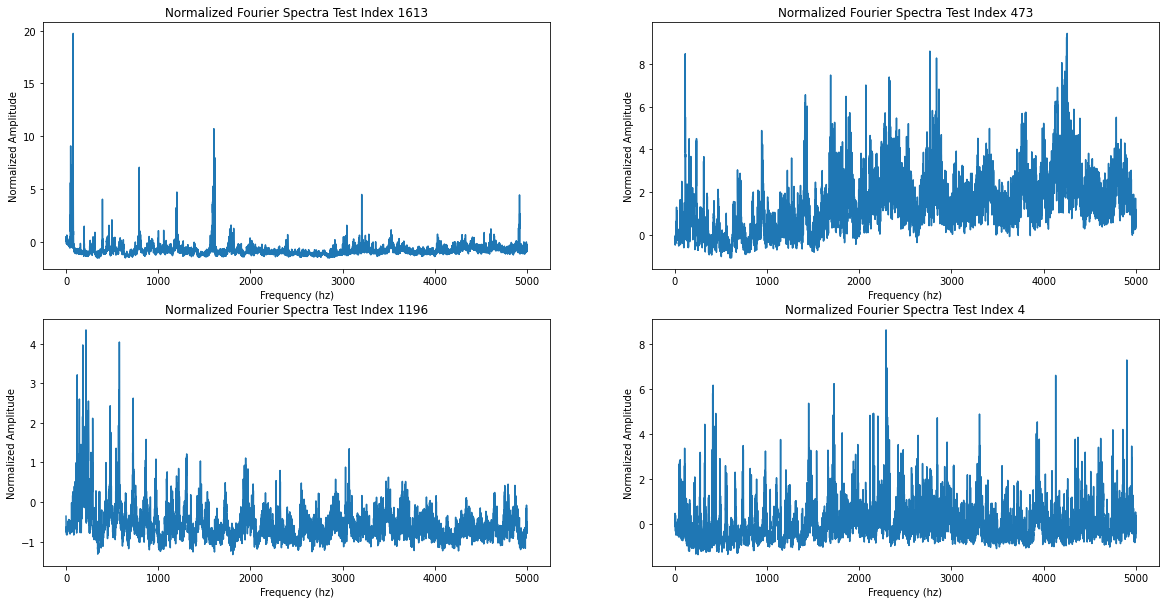

In [12]:
# pred = np.array(prediction_idcs.cpu().data)
# true = np.array(y.cpu().data)
pred = np.array(prediction_idcs.data)
true = np.array(y.data)

idx = np.random.choice(np.array(x.data).shape[0], 4, False)

fig, ((a1, a2),(a3, a4)) = plt.subplots(2, 2)
axes = [a1, a2, a3, a4]

for j, i in enumerate(idx):
    axes[j].set_title(f"Normalized Fourier Spectra Test Index {i}")
    max_freq = 5000 #hz
    freq_steps = np.linspace(0, max_freq, 10_000)
    axes[j].plot(freq_steps, np.array(x[i].data))
    axes[j].set_xlabel("Frequency (hz)")
    axes[j].set_ylabel("Normalized Amplitude")

fig.set_size_inches(20, 10)

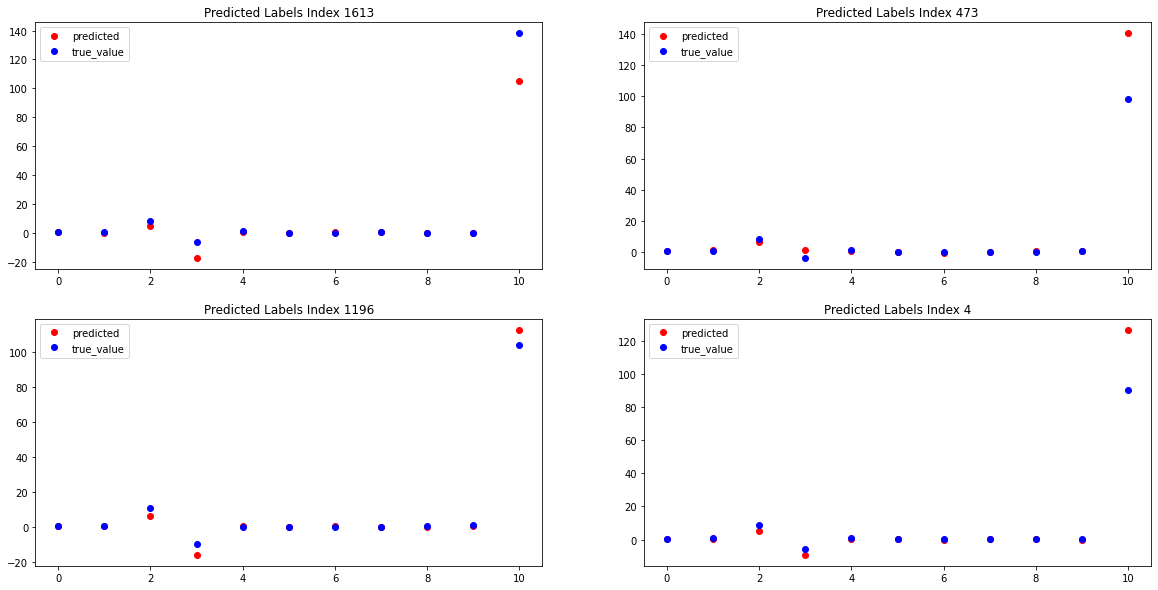

In [13]:
fig, ((a1, a2),(a3, a4)) = plt.subplots(2, 2)
axes = [a1, a2, a3, a4]

for j, i in enumerate(idx):
    predicted_unnormalized_data = un_normalize_model_output(pred[i], train_label_means, train_label_std)
    unnormalized_label = un_normalize_model_output(true[i], train_label_means, train_label_std)
    axes[j].plot(predicted_unnormalized_data, 'ro')
    axes[j].plot(unnormalized_label, 'bo')
    axes[j].legend(["predicted", "true_value"])
    # axes[j].axis([-0.5, 9.5, -10, 10]) # Un-comment this line to see classes 1-10 better, comment it to see class 11
    axes[j].set_title(f"Predicted Labels Index {i}")
fig.set_size_inches(20, 10)

# Run Model for Pre-Recorded Sound File Input

In [14]:
import scipy
from scipy.fftpack import fft
from scipy.io import wavfile

def visualize_waveform_and_fft(file_name, do_plot=False):
    fs_rate, signal = wavfile.read(file_name)
    l_audio = len(signal.shape)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = np.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(N//2)] # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    if do_plot:
        plt.subplot(311)
        min_idx = min(len(t), len(signal))
        p1 = plt.plot(t[:min_idx], signal[:min_idx], "g") # plotting the signal
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.subplot(312)
        p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Count dbl-sided')
        plt.subplot(313)
        p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Count single-sided')
        plt.gcf().set_size_inches(20,10)
    
    return freqs_side, abs(FFT_side)

In [15]:
def run_model_on_wav_file(file_name, do_plot=False):
    fft_freqs, fft_amp = visualize_waveform_and_fft(file_name, do_plot)
    if do_plot:
        plt.gcf().set_size_inches(10, 5)
        plt.show()
        plt.figure()
    
    largest_useful_frequency_idx =  sum([1 if x < 5000 else 0 for x in fft_freqs])
    number_of_samples = (largest_useful_frequency_idx // 10_000)
    
    trim_freqs = fft_freqs[:number_of_samples * 10_000]
    
    trim_amps = fft_amp[:number_of_samples * 10_000]
    trim_amps /= len(trim_amps)
    
    trans_freqs = trim_freqs.reshape(-1, number_of_samples).mean(axis=1)
    trans_amps = trim_amps.reshape(-1, number_of_samples).mean(axis=1)
    
    max_freq = 5000 #hz
    freq_steps = np.linspace(0, max_freq, 10_000)
    normalized_amps = torch.from_numpy(normalize(trans_amps, train_data_means, train_data_std).astype(np.float32))
    if do_plot:
        plt.plot(freq_steps, normalized_amps)
        plt.xlabel("Frequency (hz)")
        plt.ylabel("Normalized Amplitude")
        plt.title("Model Input: Normalized Fourier Frequencies")
        plt.gcf().set_size_inches(10, 5)
        plt.show()
    
    return un_normalize_model_output(np.array(best_model(normalized_amps).data), train_label_means, train_label_std)

In [16]:
def find_nearest_neighbors(output):
    all_data = df.iloc[:, :11].to_numpy()
    nearest_song = np.linalg.norm(all_data - output, axis=1).argsort()[:5]
    for x in nearest_song:
        nearest_song = df.index.values.tolist()[x]
        print(uri_to_title_artist_map[nearest_song])
        plt.plot(df.iloc[x, 0:11], 'ko')
    
    plt.plot(output, 'ro')
    plt.axis([0, 10, -10, 10])
    plt.gcf().set_size_inches(10,5)

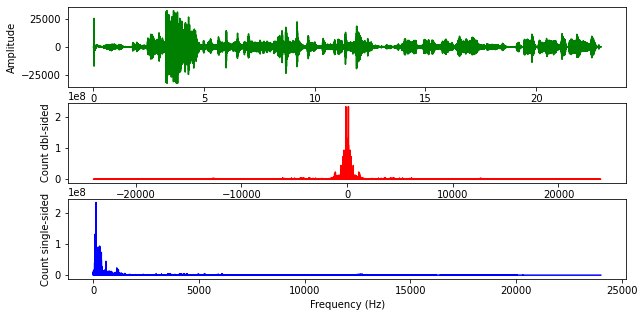

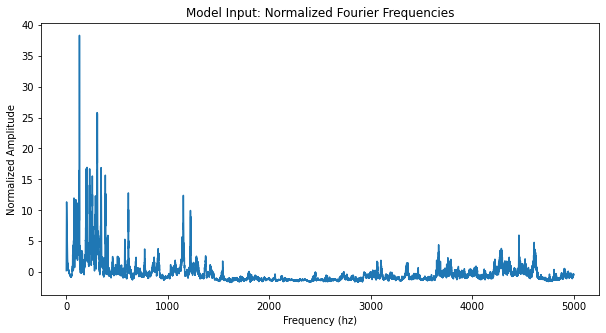

Predicts
[ 8.66442893e-01  9.69856341e-01  4.97527211e+00 -3.55573605e+00
  3.87871280e-01  2.18098683e-01  1.87409575e-03  8.85892228e-02
  2.07794263e-01  9.07541070e-01  1.17081437e+02]


In [17]:
predictions = run_model_on_wav_file("despacito.wav", True) #Outputs the predicted spotify labels to input to clustering pathway.
print("Predicts")
print(predictions)

('Hilito', 'Romeo Santos')
('No News - Edit', 'Lonestar')
('Break the Ice', 'Britney Spears')
('Woof Woof', 'SHINee')
('El 24 - Corrido', 'Banda Sinaloense MS de Sergio Lizárraga')
None


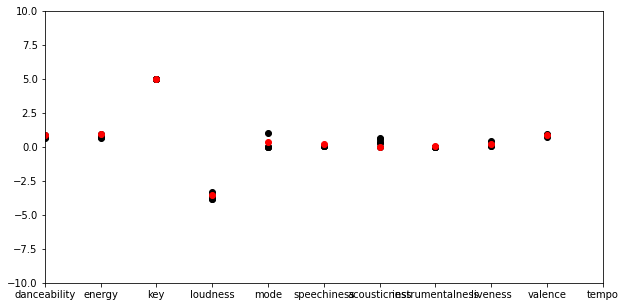

In [18]:
print(find_nearest_neighbors(predictions))

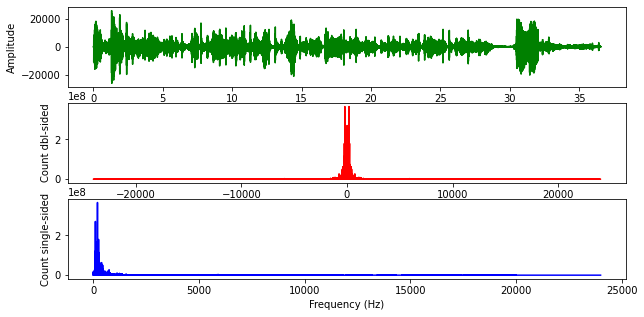

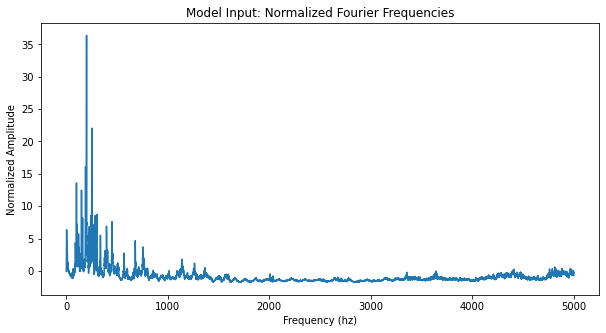

Predicts
[  0.74062656   0.63179456   4.63232833 -10.95484606   0.63921649
   0.12733832   0.4085342    0.25672219   0.18336225   0.90822625
 110.43695209]


In [20]:
predictions = run_model_on_wav_file("peach_pit.wav", True) #Outputs the predicted spotify labels to input to clustering pathway.
print("Predicts")
print(predictions)

('Better Together', 'Us The Duo')
('Akula Owu Onyeara', 'The Funkees')
('Other Chicks', 'Ciara')
('Golden', 'My Morning Jacket')
('Folsom Prison Blues - Mono Version', 'Johnny Cash')
None


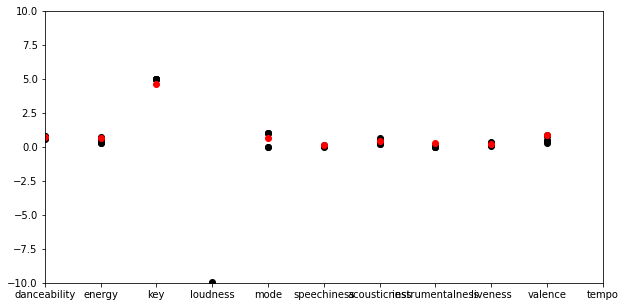

In [21]:
print(find_nearest_neighbors(predictions))

# Record your own sound file to input to model

In [ ]:
%pip install ipywebrtc
%pip install ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
from IPython.display import Audio

camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
# Hit the circle to record your own audio and input it to the neural network! Try to record for around 30 seconds.
recorder

In [ ]:
with open('recording.webm', 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i recording.webm -ac 1 -f wav file.wav -y -hide_banner -loglevel panic
output = run_model_on_wav_file("file.wav", True)

In [ ]:
print("Your Audio Analysis\n")
for i,j in zip(output, df.columns.values.tolist()[:11]):
    print(f"{j:20s}:\t\t\t{i:0.2f}")

In [ ]:
find_nearest_neighbors(output)

In [ ]:
for i in range(10000):
    plt.plot(df.iloc[i, 0:11], 'o')
plt.axis([0, 10, -25, 25])